# Hyperparameter Tuning for SVM on the MNIST Dataset
This project demonstrates hyperparameter tuning for Support Vector Machines (SVM) using the MNIST handwritten digit dataset. The primary goal is to optimize the SVM model by comparing Grid Search and Randomized Search for hyperparameter tuning, focusing on computational efficiency and accuracy improvement.

## Key Steps and Implementation

### 1. **Libraries and Dataset Initialization**

At first we fetched the MNIST Dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

import time

mnist = fetch_openml('mnist_784')
X = mnist.data
Y = mnist.target
X = X / 255.0 * 2 - 1


To view some of the MNIST dataset's data, we visualized the digit images and the corresponding labels.

X contains the pixel data for the images.
Y contains the labels for the digits (0–9).
we can look at the shape of the dataset and examine the first few samples

In [3]:
print("Shape of X:", X.shape)  # Should be (70000, 784)
print("Shape of Y:", Y.shape)  # Should be (70000,)

# Print the first row of pixel data (flattened)
print("First Image Data:", X.iloc[0])
# Print the label for the first image
print("First Label:", Y[0])


Shape of X: (70000, 784)
Shape of Y: (70000,)
First Image Data: pixel1     -1.0
pixel2     -1.0
pixel3     -1.0
pixel4     -1.0
pixel5     -1.0
           ... 
pixel780   -1.0
pixel781   -1.0
pixel782   -1.0
pixel783   -1.0
pixel784   -1.0
Name: 0, Length: 784, dtype: float64
First Label: 5


Since each image is 28x28 pixels, we reshaped a sample to this dimension and display it using matplotlib:


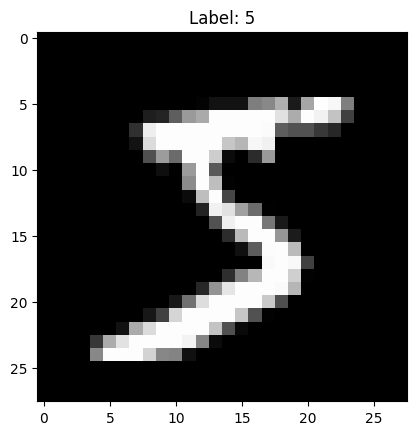

In [4]:
# Select the first image
first_image = X.iloc[0].to_numpy().reshape(28, 28)

# Display the image
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {Y[0]}")
plt.show()


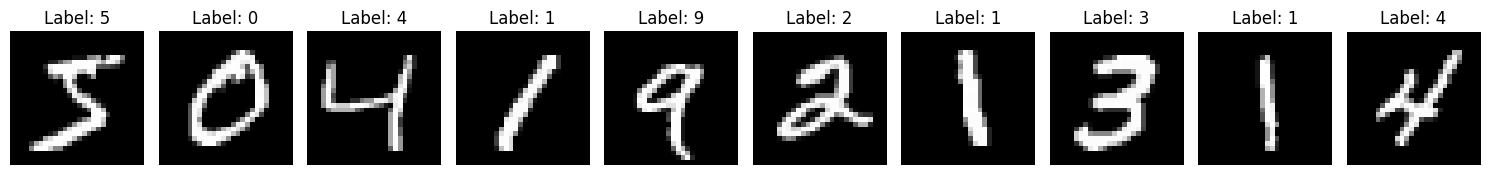

In [5]:
# Display the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    image = X.iloc[i].to_numpy().reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {Y[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


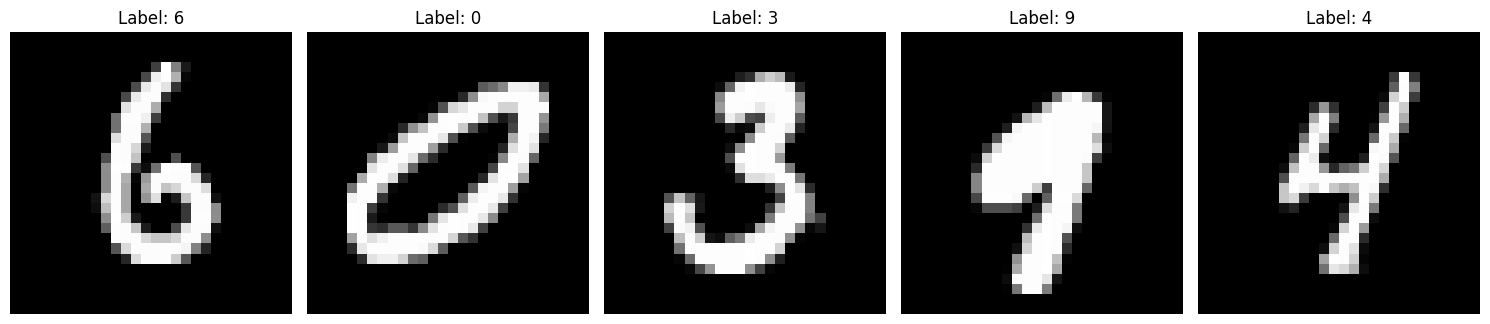

In [6]:
import random

# Randomly select 5 indices
random_indices = random.sample(range(X.shape[0]), 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, idx in enumerate(random_indices):
    image = X.iloc[idx].to_numpy().reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {Y[idx]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()



### 2. **Baseline Model (Linear SVM)**
An SVM model with a linear kernel was trained and evaluated as a baseline:

lets reduce the dataset to 6,000 training samples and 1,000 testing samples to improve computational feasibility.


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=6000, test_size=1000)
svc_linear = svm.SVC(kernel='linear').fit(X_train, Y_train)
print("Linear SVM Accuracy: ", svc_linear.score(X_test, Y_test) * 100)


Linear SVM Accuracy:  91.8


### 3. **Improved Model (SVM with RBF Kernel)**
The SVM model was enhanced using an RBF kernel, achieving better accuracy:

In [8]:
svc_rbf = svm.SVC(kernel='rbf').fit(X_train, Y_train)
print("RBF SVM Accuracy: ", svc_rbf.score(X_test, Y_test) * 100)


RBF SVM Accuracy:  95.7


### 4. **Grid Search for Hyperparameter Tuning**
Grid search was used to optimize C and gamma parameters for the RBF kernel:

In [ ]:
C_range = np.arange(1, 101, 1).tolist()
gamma_range = np.arange(0.0, 10.1, 0.1).tolist()
param_grid = dict(C=C_range, gamma=gamma_range)

grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=StratifiedKFold(n_splits=5))
start = time.perf_counter()
grid_search.fit(X_train, Y_train)
end = time.perf_counter()

print("Best Estimator (Grid Search): ", grid_search.best_estimator_)
print("Grid Search Time: ", end - start, "seconds")


### 5. **Randomized Search for Hyperparameter Tuning**
Randomized search was conducted for comparison:

In [ ]:
from scipy.stats import loguniform
param_dist = dict(C=loguniform(1e0, 1e3), gamma=loguniform(1e-4, 1e-3))
random_search = RandomizedSearchCV(svm.SVC(kernel='rbf'), param_distributions=param_dist, cv=StratifiedKFold(n_splits=5), n_iter=20)
start = time.perf_counter()
random_search.fit(X_train, Y_train)
end = time.perf_counter()

print("Best Estimator (Randomized Search): ", random_search.best_estimator_)
print("Randomized Search Time: ", end - start, "seconds")


### 6. **Final Model Training**
Using the optimal parameters, the final model was trained and evaluated:




In [ ]:
svc_optimized = svm.SVC(kernel='rbf', C=1.0, gamma=0.01).fit(X_train, Y_train)
print("Final Model Accuracy: ", svc_optimized.score(X_test, Y_test))


#### Results and Insights
###Accuracy:

Linear SVM: 91.8%
RBF SVM (default parameters): 94.8%
Optimized RBF SVM: Improved further with tuned C and gamma.
Efficiency Comparison:

Grid search provided more exhaustive results but took significantly longer.
Randomized search was faster, with competitive accuracy results.
Challenges: Due to computational constraints, smaller subsets of the MNIST dataset were used. Larger datasets resulted in different optimal C and gamma values, highlighting the importance of dataset size in hyperparameter tuning.

### Key Learnings
Hyperparameter Tuning: A crucial step to improve model performance by systematically exploring parameter combinations.
Resource Constraints: Practical projects must balance computational resources and accuracy.
Grid vs. Random Search: Randomized search can save time while achieving near-optimal results.
### Technologies Used
Python: For scripting and implementation.
Scikit-learn: For SVMs, hyperparameter tuning, and utilities.
MNIST Dataset: A widely used benchmark for digit classification.
